In [1]:
import sys
# на уровень выше из research_rank/
sys.path.insert(0, '..')
from pathlib import Path
import numpy as np
import pandas as pd
import json
from collections import defaultdict
from plot_json import convert_dictlist_to_matrix
import matplotlib.pyplot as plt

In [2]:
# from Qutrit import*
# from Adaptive_compresive_cending_qutrit import*
# plt.rcParams.update({
#     'font.size': 16,               # Размер шрифта по умолчанию
#     'axes.titlesize': 14,          # Размер заголовка
#     'axes.labelsize': 14,          # Размер подписей осей
#     'xtick.labelsize': 10,         # Размер цифр на оси X
#     'ytick.labelsize': 10,         # Размер цифр на оси Y
#     'legend.fontsize': 12          # Размер шрифта легенды
# })

# # [Gl_4(0) @ Gl_8(pi / 8), Gl_4(pi / 8) @ Gl_8(0),  Gl_4(0) @ Gl_8(0)]
# # Gl_2(a * pi / 180) @ Gl_4(b * pi / 180)
# min_el = 1
# # for a in range(50, 58, 2):
# #     for b in range(0 , 95, 2):
# #         for c in range(0 , 95, 2):
# a, b, c = -45, 11.25, -45
# protocol = [Gl_4(0) @ Gl_8(pi / 8), Gl_4(pi / 8) @ Gl_8(0), Gl_4(0) @ Gl_8(0) @ Gl_8(0)]
# rank = 1
# tomography_1 = ACT(protocol, rank, 3)

# x = np.array([1, 2, 3])
# svx_list = []         
# fidelity_list = []
# N = 500


# for i in tqdm(range(N)):
#     svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
#     x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-6,\
#                                                         max_iters_in_semidefinite_program=10**8)
#     for ind_min in range(len(x_min_list)):
#         x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
#     for ind_max in range(len(x_max_list)):
#         x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
#     fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]), tomography_1.Fidelity(x_min_list[2], x_max_list[2])]#, tomography_1.Fidelity(x_min_list[3], x_max_list[3])] 
#     if svx_list_one_measurement is not np.inf :
#         svx_list.append(svx_list_one_measurement)
#         fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

# y = np.mean(np.array(svx_list),axis = 0)
# std = np.std(np.array(svx_list),axis = 0)
# fidelity_mean = np.mean((fidelity_list), axis = 0)
# fidelity_std = np.std(np.array(fidelity_list),axis = 0)
# # print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
# # if y[-1] < min_el:
# #     min_el = y[-1]
# #     print(a, b, c,  min_el)
# # if y[-1] < 10**-5:
# #     print(a, b, c, y[-1])
# print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
# print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
# print(y[-1])
# pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1])


100%|██████████| 100/100 [00:56<00:00,  1.77it/s]


Mean fidelity: [0.03839594 0.1001643  0.82827667 0.88664883 1.        ] 	Std fidelity: [4.21628685e-02 8.44487977e-02 1.01158273e-01 7.65886164e-02
 1.30202500e-12]
Mean svx for protocol: [1.00000000e+00 8.63720723e-01 1.22960259e-01 7.72970108e-02
 9.59512626e-15] 	Std s_cvx for protocol: [0.00000000e+00 9.37439045e-02 8.18221086e-02 5.08025291e-02
 2.30229402e-13]


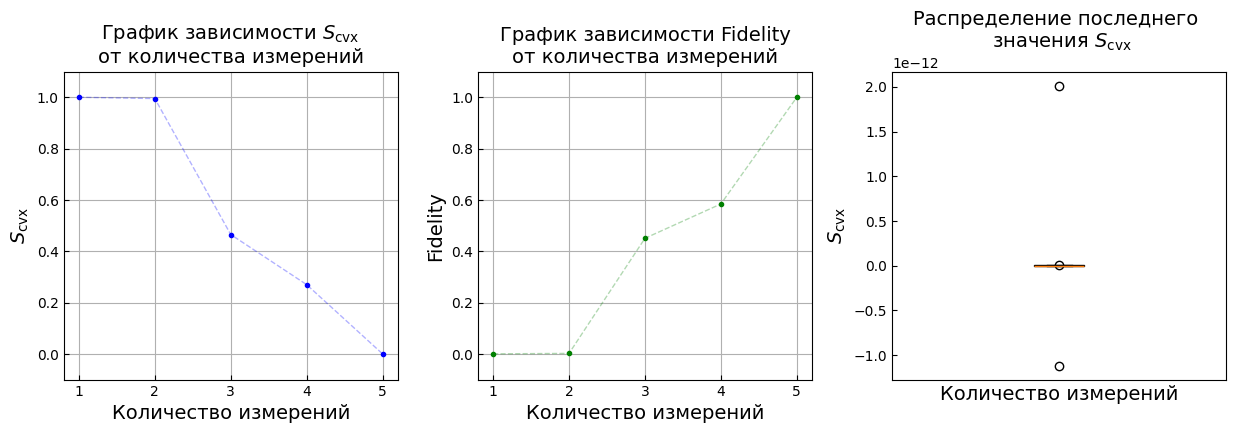

Mean fidelity between start state and max state:
 [0.78676542 0.86781922 0.96031144 0.97229919 1.        ]
Mean fidelity between start state and min state:
 [0.13831188 0.17567161 0.90015969 0.9314669  1.        ]


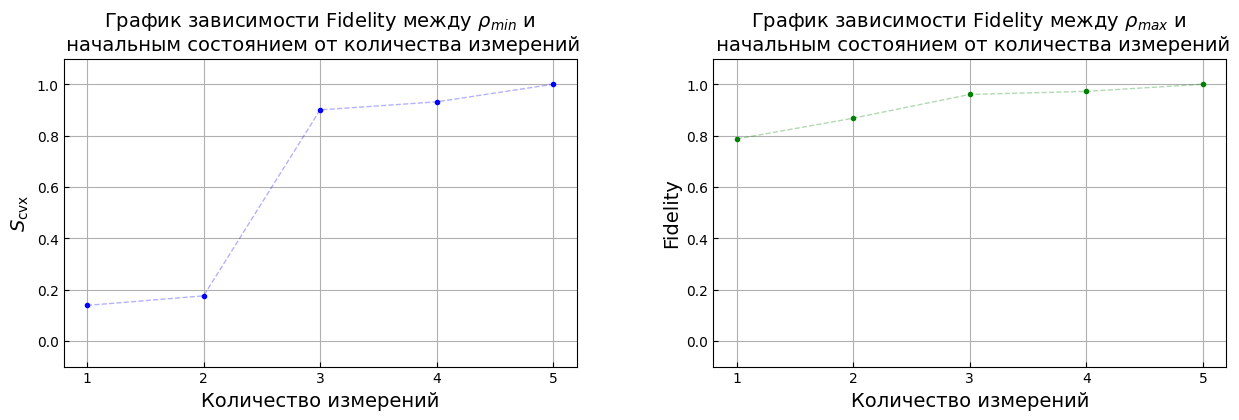

In [18]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
protocol = [Gl_4(3 * pi / 8), Gl_4(0), Gl_4(pi / 8),  Gl_4(5 * pi / 8),  Gl_4(7 * pi / 8)]
rank = 3
tomography_1 = ACT(protocol, rank, 3)
# state = tomography_1.r_rank_r(rank, 3, "complex")

plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})
# state = np.array([[1, 0, 0], [0, 0, 0], [0, 0, 0]], dtype=complex)
x = np.array([1, 2, 3, 4 ,5])
svx_list = []         
fidelity_list = []
fidelity_max_start = []
fidelity_min_start = []
r_max = []
r_min = []
N = 100

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-9,\
                                                         max_iters_in_semidefinite_program=10**8)#, random_r=state)
    state = tomography_1.random_r
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3]),\
                               tomography_1.Fidelity(x_min_list[4], x_max_list[4])] 
    
    fidelity_list_xmax_start = [tomography_1.Fidelity(state, x_max_list[0]), tomography_1.Fidelity(state, x_max_list[1]),\
                               tomography_1.Fidelity(state, x_max_list[2]), tomography_1.Fidelity(state, x_max_list[3]),\
                               tomography_1.Fidelity(state, x_max_list[4])]
    
    fidelity_list_xmin_start = [tomography_1.Fidelity(state, x_min_list[0]), tomography_1.Fidelity(state, x_min_list[1]),\
                            tomography_1.Fidelity(state, x_min_list[2]), tomography_1.Fidelity(state, x_min_list[3]),\
                            tomography_1.Fidelity(state, x_min_list[4])]
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))
        fidelity_max_start.append(np.abs(fidelity_list_xmax_start))
        fidelity_min_start.append(np.abs(fidelity_list_xmin_start))
        r_max.append(x_max_list[-1])
        r_min.append(x_min_list[-1])
y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)
fidelity_mean_max_start = np.mean((fidelity_max_start), axis = 0)
fidelity_mean_min_start = np.mean((fidelity_min_start), axis = 0)

s_cvx_max = np.max(np.array(svx_list),axis = 0)
fidelity_min = np.min((fidelity_list), axis = 0)

print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
pl_fid_s_cvx_distr(x, s_cvx_max, fidelity_min, np.array(svx_list)[:, -1])
print("Mean fidelity between start state and max state:\n", fidelity_mean_max_start)
print("Mean fidelity between start state and min state:\n", fidelity_mean_min_start)
pl_fid_max_min(x, fidelity_mean_min_start, fidelity_mean_max_start)

In [14]:
eigenvalues, eigenvectors = np.linalg.eig(x_max_list[3])
print("Собственные значения", np.around(eigenvalues, 7))

Собственные значения [ 9.553893e-01+0.j -5.117000e-04+0.j  4.512270e-02-0.j]


In [94]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})

# [Gl_8(pi / 8), Gl_4(pi / 8) @ Gl_8(0), np.diag([1, 1, 1])]
# Gl_2(a * pi / 180) @ Gl_4(b * pi / 180)
min_el = 1
# for a in range(50, 58, 2):
#     for b in range(0 , 95, 2):
#         for c in range(0 , 95, 2):
a, b, c = -45, 11.25, -45
protocol =  [Gl_4(0) @ Gl_8(0), Gl_4(0) @ Gl_8(pi / 8), Gl_4(pi / 8) @ Gl_8(0)]
rank = 1
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3])
svx_list = []         
fidelity_list = []
N = 500


for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-5,\
                                                        max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]), tomography_1.Fidelity(x_min_list[2], x_max_list[2])]#, tomography_1.Fidelity(x_min_list[3], x_max_list[3])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)
# print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
# if y[-1] < min_el:
#     min_el = y[-1]
#     print(a, b, c,  min_el)
# if y[-1] < 10**-5:
#     print(a, b, c, y[-1])
            #     # print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
            #     print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
print(y[-1])
pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1])


  1%|          | 3/500 [00:06<16:54,  2.04s/it]

Failure:interrupted


SolverError: Solver 'SCS' failed. Try another solver, or solve with verbose=True for more information.

100%|██████████| 500/500 [03:56<00:00,  2.12it/s]

0.0011119034683773768


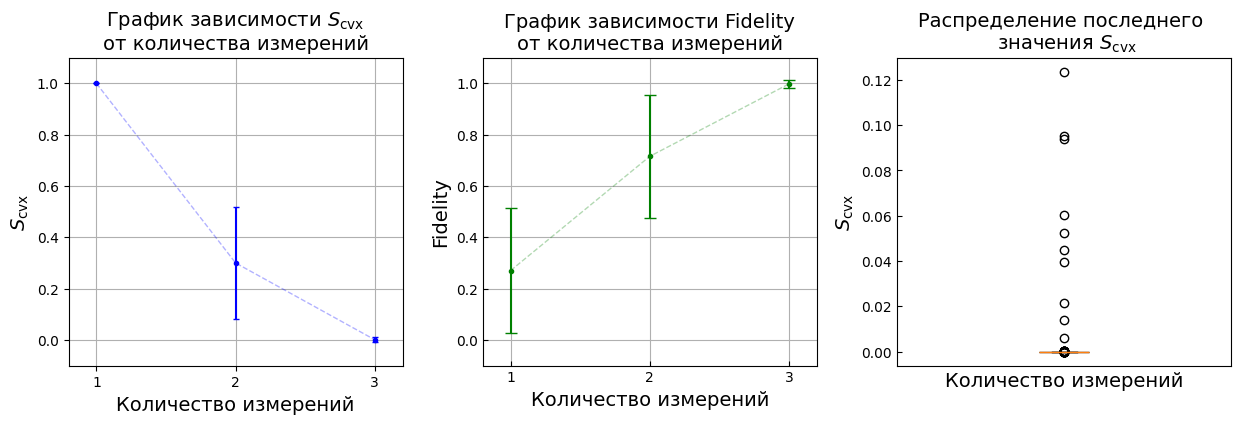

In [13]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})

# [Gl_8(pi / 8), Gl_4(pi / 8) @ Gl_8(0), np.diag([1, 1, 1])]
# Gl_2(a * pi / 180) @ Gl_4(b * pi / 180)
min_el = 1
# for a in range(50, 58, 2):
#     for b in range(0 , 95, 2):
#         for c in range(0 , 95, 2):
a, b, c = -45, 11.25, -45
protocol = [Gl_4(pi / 8) @ Gl_8(0), Gl_4(0) @ Gl_8(0), Gl_4(0) @ Gl_8(pi / 8)]
rank = 1
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3])
svx_list = []         
fidelity_list = []
N = 500


for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-5,\
                                                        max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]), tomography_1.Fidelity(x_min_list[2], x_max_list[2])]#, tomography_1.Fidelity(x_min_list[3], x_max_list[3])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)
# print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
# if y[-1] < min_el:
#     min_el = y[-1]
#     print(a, b, c,  min_el)
# if y[-1] < 10**-5:
#     print(a, b, c, y[-1])
            #     # print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
            #     print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
print(y[-1])
pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1])
